In [2]:
import nltk
import os
import string
from HMM import supervised_HMM, unsupervised_HMM, HiddenMarkovModel
import re
import numpy as np
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    visualize_sparsities,
    animate_emission
)
from tqdm import tqdm

In [3]:
def load_poems(filename):
    
    lines = [] # 2d dictionary, each array is a split + cleaned line
    words = {} # dictionary of a word, and its frequency
    
    file = open(filename, 'r')
    
    for line in file:
        line = line.strip()
        if  len(line) < 10:
            # Too short to be a valid line
            continue
        line = "".join(l for l in line if l not in string.punctuation)
        line = line.lower()
        line = line.split()
        
        lines.append(line)

        for word in line:
            try:
                # add to frequency if the word is already in the dic
                words[word] += 1
            except KeyError:
                # if not, add the word to the dic
                words[word] = 1
    return lines, words

In [4]:
file = "data/shakespeare.txt"
lines, words = load_poems(file)

In [5]:
lines[0]

['from', 'fairest', 'creatures', 'we', 'desire', 'increase']

In [6]:
def unsupervised_learning(lines, n_states, n_iters):
    '''
    n_iters: Number of iterations we should go through.
    n_states: Number of hidden states our HMM should have.
    '''
    # Train the HMM.
    obs, obs_map =  parse_observations(lines)
    flat_lines = [[item] for sublist in lines for item in sublist]
    leHMM = unsupervised_HMM(obs, n_states, n_iters)
    return leHMM, obs,obs_map 
    

In [7]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

In [8]:
def parse_observations(lines):

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [9]:
# get syllable info from syllable_dictionary.txt
def load_syllables(filename):
    file = open(filename, 'r')
    syllable = {}
    for line in file:
        line = line.split()
        #print(line)
        word = line[0]
        rest = line[1: len(line)]

        syllable[word] = rest
    return syllable

In [10]:
filename = "data/Syllable_dictionary.txt"
syllable = load_syllables(filename)

In [12]:
def save_HMM(hmmmmmm, filename):
    
    with open(filename+".txt", "w+") as filept:
        filept.write(str(hmmmmmm.L)+"\n")
        filept.write(str(hmmmmmm.D)+"\n")
        for i in hmmmmmm.A:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        for i in hmmmmmm.O:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        

def read_HMM(filename):
    with open(filename+".txt", "r") as filept:
        L = int(filept.readline())
        D = int(filept.readline())
        O = []
        A = []
        for i in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            A.append(line)
        for j in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            O.append(line)
    return HiddenMarkovModel(A, O)

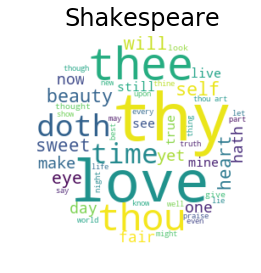

In [12]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [15]:
# test different numbers of hidden states for 10 iterations
# use generate_emission_syllable_correct (modified TA code)
# this is also being used to generate wordclouds for the states
# also save all these models
states = [1, 2, 4, 8, 12, 16]
obs, obs_map =  parse_observations(lines)
obs_map_r = obs_map_reverser(obs_map)


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Training 1-state model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
Model training complete!
Sample sonnet:
In recured winters the of your no in
Inheritors triumphant speak doubt worth
Edge still babe pilgrimage thou vile the canst
Carved hand proceed so happy aside grey
But of self then thy and and but faith friend
Poor her and with this sing to lack that prone
A this thy so pitch me live return by
Wilt lose restful times his to fall unused
With thy to greet wink carcanet my parts
Heavy the is to in griefs my even tongue
We more with hammered to with you this good
They so sweet but these thy away not which
Wills doth thee as had and such conquest me
From woeful the shall no age flowers so did
Sparsity graphs:


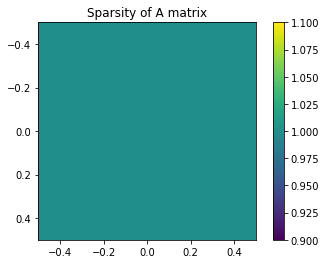

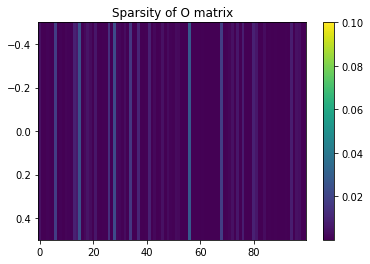

State wordclouds


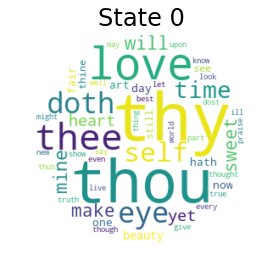


 17%|█████████████▊                                                                     | 1/6 [05:27<27:16, 327.27s/it]

Training 2-state model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
Model training complete!
Sample sonnet:
Thy to sometime thou love her so give all
That you marble evil falsehood green but
Flower teachest this attaint pain quiet more
The i my hour do child see pass you since
When love staineth buried dead which is birth
Sovereign to help and the beauty self no
Whose case look to minds most the what in looks
Yet that strength dearest to lack fear in in
Eyes ransom yet place thee longer gentlest
My can concord loveliness and cannot
Being no though shown what wilt who calls long though
Alive that boy and prevent are thou do
Orphans swift accumulate supposed things
You more thine love and pry prizing and with
Sparsity graphs:


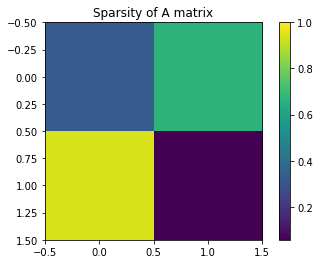

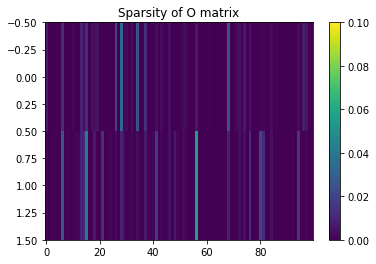

State wordclouds


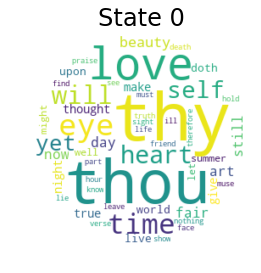

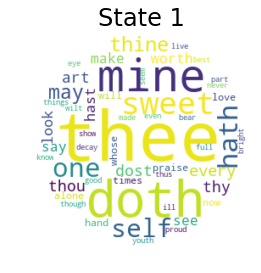


 33%|███████████████████████████▋                                                       | 2/6 [15:54<27:49, 417.31s/it]

Training 4-state model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
Model training complete!
Sample sonnet:
Carve have thy records friend do see and in
But shall when never their can hours of bath
Then too and seen pattern and will for none
Why old pilgrimage sweet wrinkle vile do
Lest by of for gust hearts vile to red now
Of like from wide tears and to nor decay
Awake the wherewith say and sooner are
On my making breath thy to unused store
Because go sees but of falsehood glass my
My victor no to that and of pass fair
By to fresh the compared pitying i seals
Blunt as transfix of art my doting the
Whom unworthiness time benefit wise
That we good a breathe worst i show thy bold
Sparsity graphs:


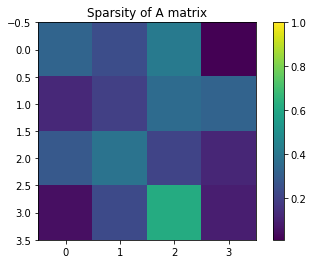

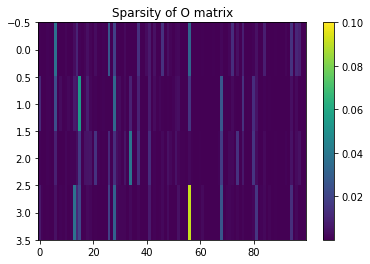

State wordclouds


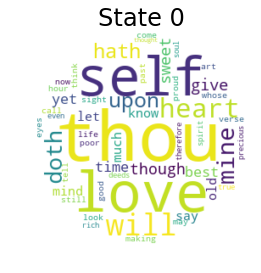

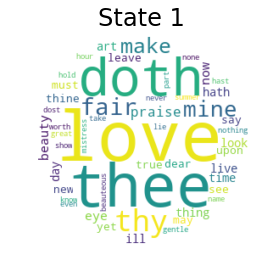

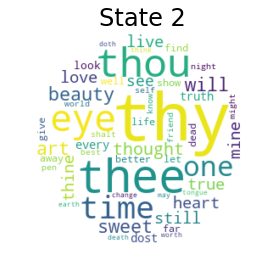

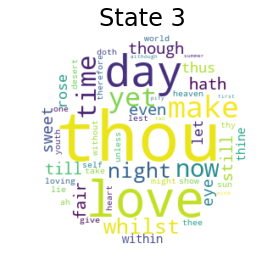


 50%|█████████████████████████████████████████▌                                         | 3/6 [37:37<34:08, 682.88s/it]

Training 8-state model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
Model training complete!
Sample sonnet:
Serving constant tires swear me living the
Hour transport world an should or yet might than
Of with renewest of with to with that
Saturn turned so services o grew hearts
Pilgrimage spirit spring his mud my and to
Treasure mine doth what may slave base i to
And thou souls it looks whatsoever my
Wear thy not it sight you and with it scope
Thy base more excuse i in and love parts
Hiding thy day him put pays happy doth
Love in night me you to though in remain
That wert report as honour which are near
Me and disabled of love barren
And my from thee former care self to should
Sparsity graphs:


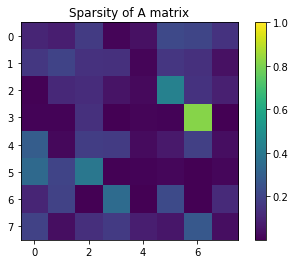

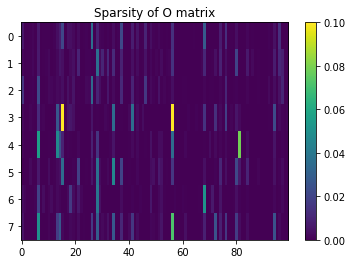

State wordclouds


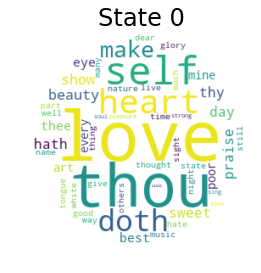

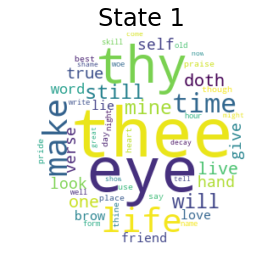

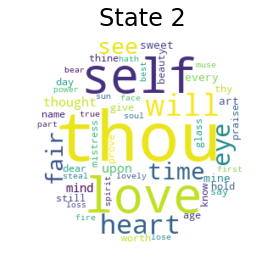

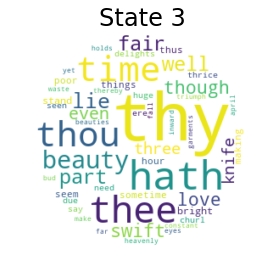

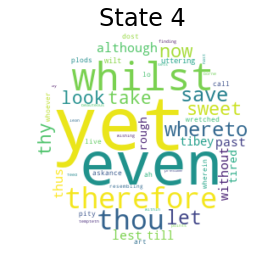

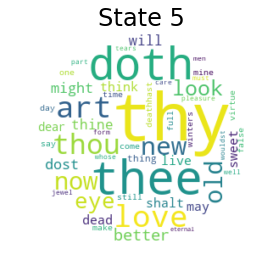

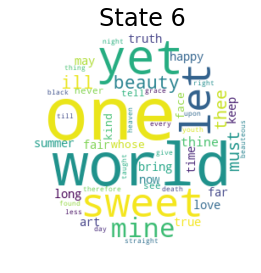

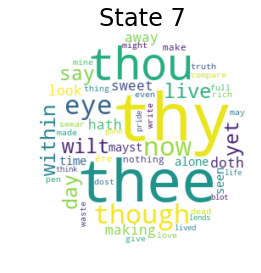


 67%|█████████████████████████████████████████████████████▎                          | 4/6 [1:22:02<42:34, 1277.47s/it]

Training 12-state model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
Model training complete!
Sample sonnet:
What thine art them with scythe put of my must
Hate by love whose for then subscribes if whose
I me embassage i you of and in
And lovely nearly reserve delight both
On counterfeit own some own half greater war
Night gently bring should quicker on loved they
Comment long whilst grace hand i of before
Dull unthrifts mine taken alone hid set
Shadow i worthy name self time thy be
Purpose if thy love or time painting drugs
The there stirred it heart with from harder and
Raiment thought cup true love so garments why
A make well i night is as song not when
Leaves in beard small when absent thou expressed
Sparsity graphs:


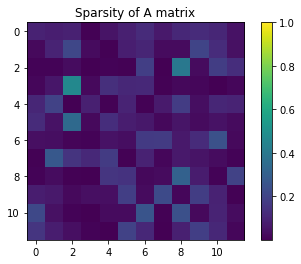

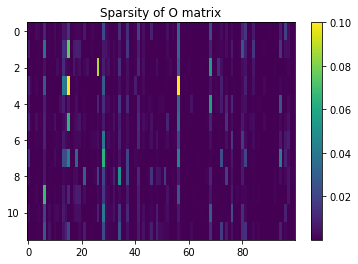

State wordclouds


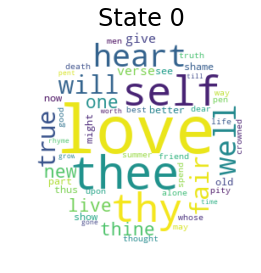

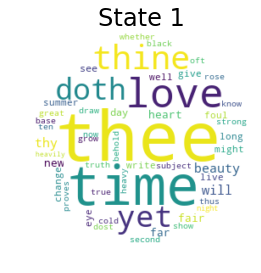

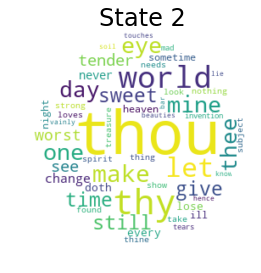

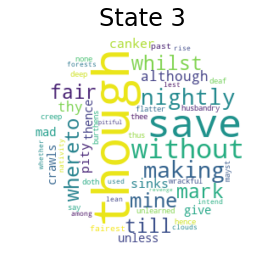

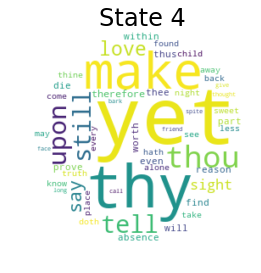

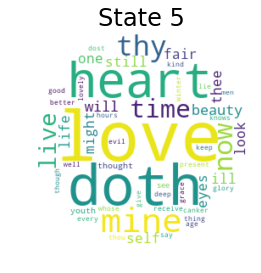

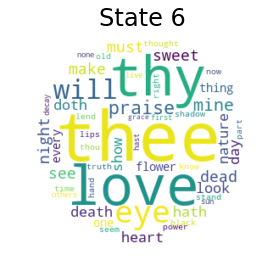

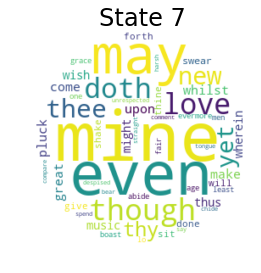

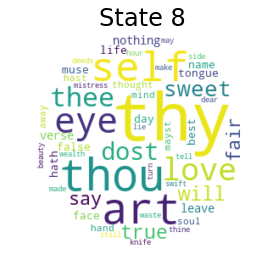

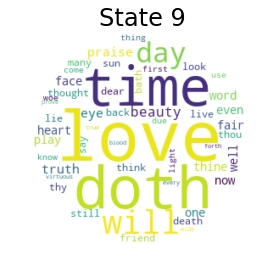

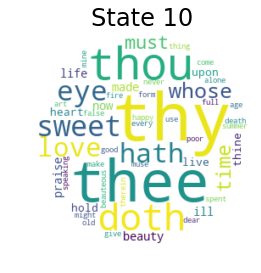

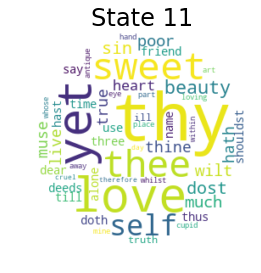


 83%|██████████████████████████████████████████████████████████████████▋             | 5/6 [2:32:49<36:08, 2168.58s/it]

Training 16-state model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
Model training complete!
Sample sonnet:
It of no and delights that thy me doth
Blessed thee being to at of to frank cruel
When thine mind leaves so longer twain lovers
Than every of his that why i at if
I the evil eye of lives summers how
Do this years writ some compound nothing do
That eternal nature clean loss my both
To follow steal gift of griefs exchanged and
Write of hair lovely map by worthless since
Are me upon belied of sake thee of
Faults light and you scope frame thy thine my my
His when but are remove heart make bird will
It my have interest advantage to this


IndexError: list index out of range

In [16]:
for j in tqdm(range(len(states))):
    print (f'Training {states[j]}-state model...')
    # for each state number, train a model
    hmm  = unsupervised_HMM(obs, states[j], 10)
    # save the model
    name = f'10-iter-{states[j]}-hidden-hmm'
    save_HMM(hmm, name)
    
    print ('Model training complete!')
    print ('Sample sonnet:')
    
    # make a sample poem
    for i in range(14): # each poem is 14 lines long
        emission = hmm.generate_emission_syllables_correct(10, obs_map_r, syllable) # each line is 10 syllables long
        sentence = [obs_map_r[i] for i in emission[0]]

        print(' '.join(sentence).capitalize())
    
    print ('Sparsity graphs:')
    # look at sparsity graphs
    visualize_sparsities(hmm, O_max_cols=100)
    
    print ('State wordclouds')
    # look at state wordclouds
    wordclouds = states_to_wordclouds(hmm, obs_map, syllable)
    
    print ('\n\n')

Sparsity graphs:


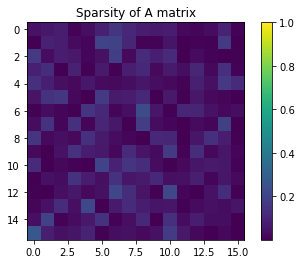

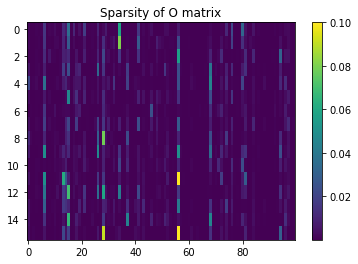

State wordclouds


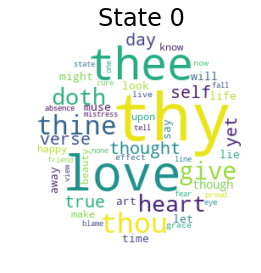

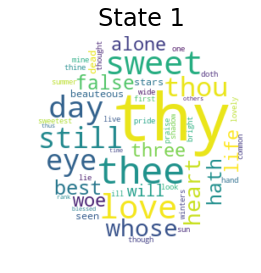

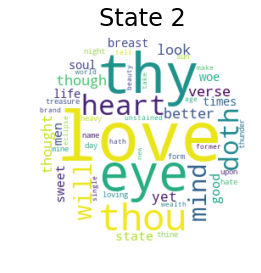

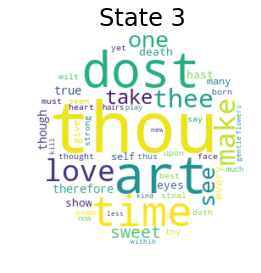

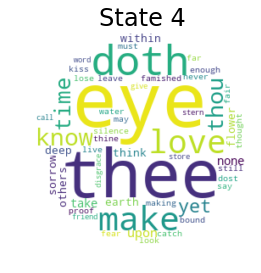

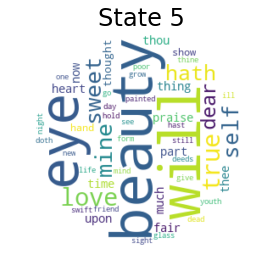

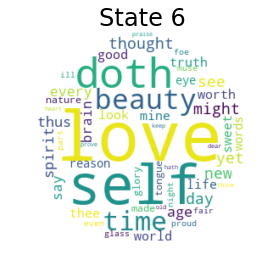

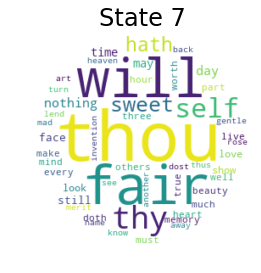

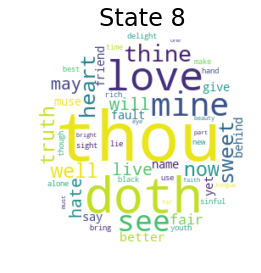

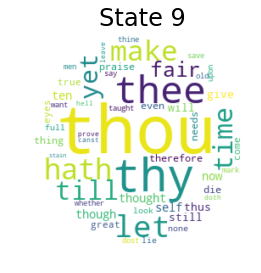

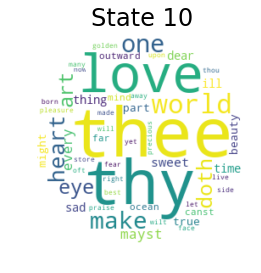

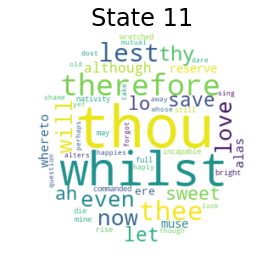

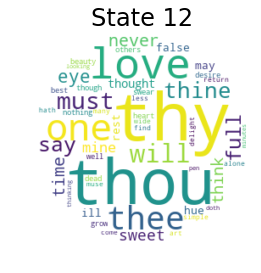

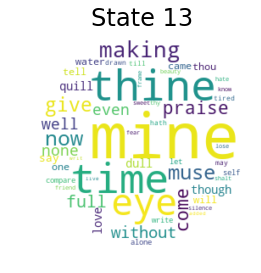

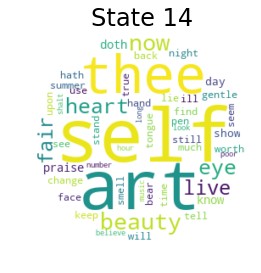

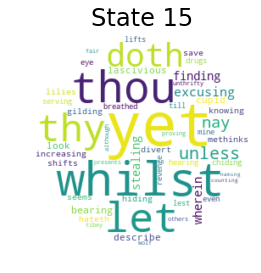

In [17]:
# idk why there was an error
# here's the stuff
print ('Sparsity graphs:')
# look at sparsity graphs
visualize_sparsities(hmm, O_max_cols=100)

print ('State wordclouds')
# look at state wordclouds
wordclouds = states_to_wordclouds(hmm, obs_map, syllable)

In [20]:
# make a sample poem
for i in range(14): # each poem is 14 lines long
    emission = hmm.generate_emission_syllables_correct(10, obs_map_r, syllable) # each line is 10 syllables long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

And thy as shape well no all i it the
Hate thine call evermore music they in
Do way with in have proposed i within
Gives by dead was conceit politic for
Quest for that to which shouldst thee and honey
Parts store a love meadows seek love on and
The idolatry love clock to who heaven
His must and are and great my odour fixed
Might lines numbers be ceremony fears
Do dross if fool of thou can saw slight rolling
To is added well my counterpart or
Fearing more you but i numbers hast mend
Graces that the knows from to i horses
Hath sorrow rainy in to my look but


In [21]:
anim = animate_emission(hmm, obs_map, M=8)
HTML(anim.to_html5_video())

TypeError: states_to_wordclouds() missing 1 required positional argument: 'syllable'

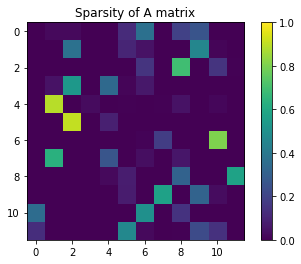

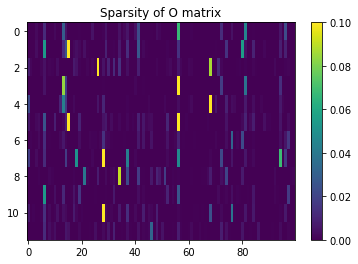

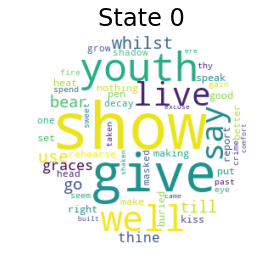

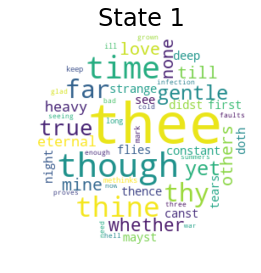

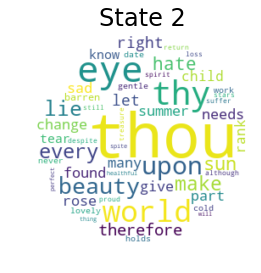

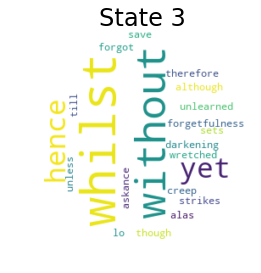

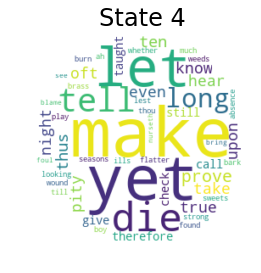

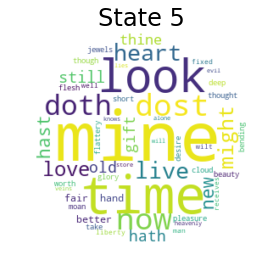

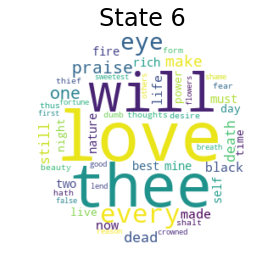

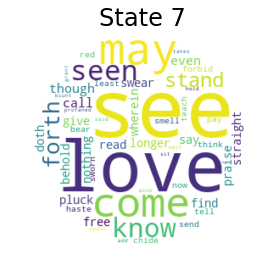

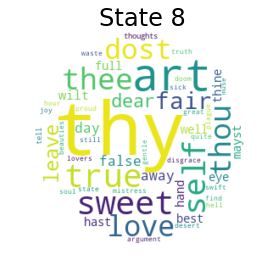

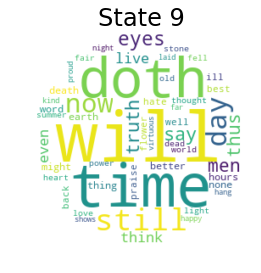

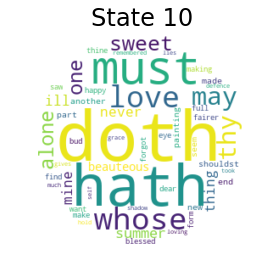

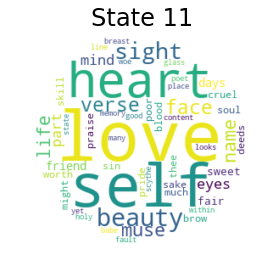

In [16]:
le40HMM = read_HMM("40-iter-12-hidden-hmm")
visualize_sparsities(le40HMM, O_max_cols=100)

wordclouds = states_to_wordclouds(le40HMM, obs_map, syllable)

In [19]:
    # make a sample poem
    for i in range(14): # each poem is 14 lines long
        emission = le40HMM.generate_emission_syllables_correct(10, obs_map_r, syllable) # each line is 10 syllables long
        sentence = [obs_map_r[i] for i in emission[0]]

        print(' '.join(sentence).capitalize())

Faring thy pride shown one therefore true more
Time in all yet it art tell of pretty
Why as love think word gracious to thus me
Forgetfulness thou my save do sure doth
Him shook view you pity virtue self is
Them the after loves friends he struck we than
Matter the every asleep that then can
Upon of worms painted my hied of days
On wits outlive thy him none love loved both
One to me is when are time for will from
Within i do smoke simple wear self have
My departest fiend the sick of when the
Leaped better stole unions healthful some my
All called in on rare one is every seem
